# Import Library

In [2]:
import sqlite3
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

# Load Data

In [4]:
# Uncomment jika data masih berupa skrip SQL
# conn = sqlite3.connect('database.db')
# cursor = conn.cursor()
# with open('DATASET/datatransaksi.sql', 'r') as file:
#     sql_script = file.read()
# try:
#     cursor.executescript(sql_script)
#     conn.commit()
#     print("Skrip SQL berhasil dijalankan.")
# except sqlite3.Error as e:
#     print(f"Terjadi kesalahan: {e}")
# finally:
#     conn.close()

In [5]:
conn = sqlite3.connect('database.db')
cursor = conn.cursor()

sql_script = """SELECT * FROM laporan;"""
cursor.execute(sql_script)
rows = cursor.fetchall()

# Get the column names from the cursor
columns = [description[0] for description in cursor.description]

# Create a DataFrame from the results
df = pd.DataFrame(rows, columns=columns)

# Display the DataFrame
df

,id,id_user,tanggal,jumlah_transaksi,jumlah_total
0,5,51,2017-03-02,0,0.0
1,6,51,2017-03-01,0,0.0
2,11,51,2017-03-06,0,0.0
3,15,2854,2017-03-07,1,100000.0
4,18,51,2017-03-07,0,0.0
...,...,...,...,...,...
199995,216398,83683,2018-08-02,3,80000.0
199996,216399,79976,2018-08-02,28,1989000.0
199997,216400,27681,2018-08-02,4,195000.0
199998,216401,46780,2018-08-02,1,22000.0


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                200000 non-null  int64  
 1   id_user           200000 non-null  int64  
 2   tanggal           200000 non-null  object 
 3   jumlah_transaksi  200000 non-null  int64  
 4   jumlah_total      200000 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.6+ MB


In [8]:
df.describe()

,id,id_user,jumlah_transaksi,jumlah_total
count,200000.000000,200000.000000,200000.000000,2.000000e+05
mean,112088.919975,47097.271495,7.072060,2.502532e+11
std,60525.968462,23892.580635,17.476887,1.118035e+14
min,5.000000,1.000000,-2.000000,-6.540180e+10
25%,59838.750000,26932.000000,1.000000,4.600000e+04
50%,112212.500000,46482.000000,2.000000,2.200000e+05
75%,164584.250000,66676.250000,6.000000,7.930000e+05
max,216402.000000,93819.000000,1291.000000,5.000000e+16


In [9]:
df.head(5)

,id,id_user,tanggal,jumlah_transaksi,jumlah_total
0,5,51,2017-03-02,0,0.0
1,6,51,2017-03-01,0,0.0
2,11,51,2017-03-06,0,0.0
3,15,2854,2017-03-07,1,100000.0
4,18,51,2017-03-07,0,0.0


In [10]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

In [11]:
df.sort_values(by='tanggal',inplace=True)

In [12]:
for i in df['tanggal'].dt.year.unique():
    print(i)

1970
2000
2009
2010
2012
2013
2014
2015
2016
2017
2018
2019


In [13]:
df['tanggal'].dt.year.value_counts()

tanggal
2018    141501
2017     58453
2010        15
2015         8
2016         8
2013         4
2012         3
1970         2
2000         2
2019         2
2009         1
2014         1
Name: count, dtype: int64

In [14]:
print('empty value')
for col in df.columns:
    print(f'{col} : {df[col].isna().sum()}')

empty value
id : 0
id_user : 0
tanggal : 0
jumlah_transaksi : 0
jumlah_total : 0


# Preprocess

In [16]:
df['year'] = df['tanggal'].dt.year

In [17]:
df['year_month'] = df['tanggal'].dt.to_period('M').dt.to_timestamp()
df

,id,id_user,tanggal,jumlah_transaksi,jumlah_total,year,year_month
3108,9642,11908,1970-01-01,2,125000.0,1970,1970-01-01
277,1568,5012,1970-01-01,6,677000.0,1970,1970-01-01
188706,204686,59218,2000-01-01,1,295000.0,2000,2000-01-01
85350,96835,24057,2000-01-02,0,0.0,2000,2000-01-01
13871,21761,23310,2009-02-22,1,8000.0,2009,2009-02-01
...,...,...,...,...,...,...,...
194199,210396,92391,2018-08-10,1,2000.0,2018,2018-08-01
183679,199493,89550,2018-08-22,8,2479.0,2018,2018-08-01
185478,201361,89550,2018-08-24,2,190.0,2018,2018-08-01
115931,129070,68280,2019-03-24,1,1000000.0,2019,2019-03-01


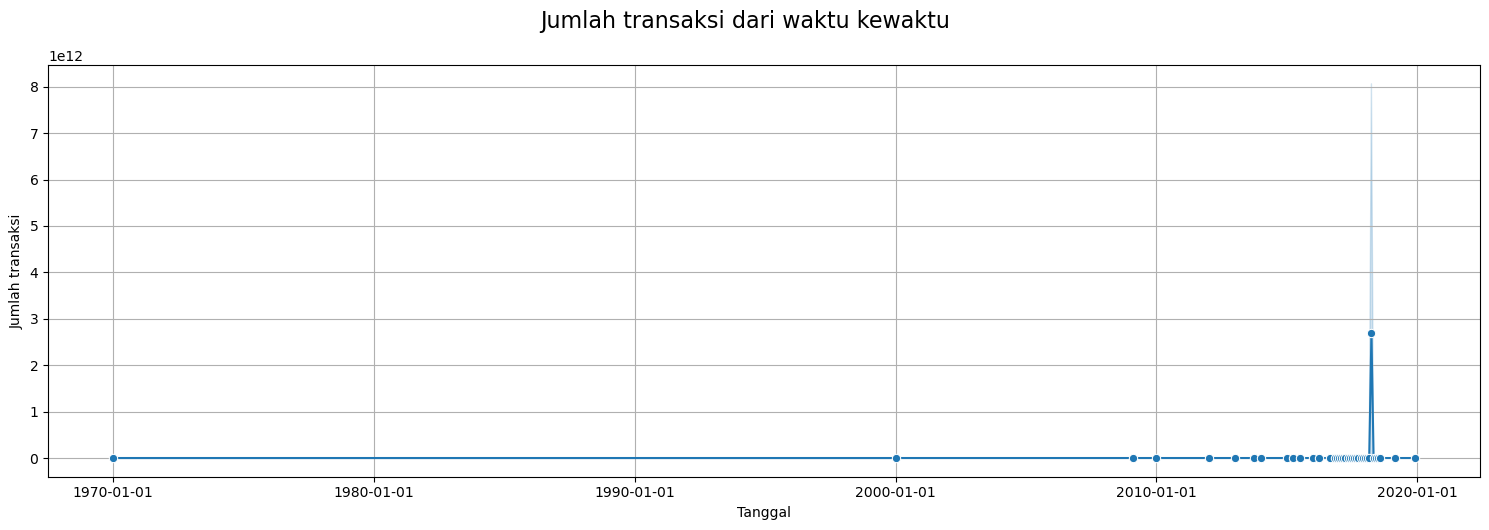

In [18]:
fig, axes = plt.subplots(figsize=(15, 5))
sns.lineplot(data=df, x='year_month', y='jumlah_total', ax=axes,marker='o')
axes.set_xlabel('Tanggal')
axes.set_ylabel('Jumlah transaksi')
axes.tick_params(axis='x')
axes.xaxis.set_major_locator(mdates.AutoDateLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes.grid(True)
plt.tight_layout()
plt.suptitle('Jumlah transaksi dari waktu kewaktu',fontsize=16, x=0.5, y=1.05)
plt.show()

In [19]:
df.groupby(by=['year']).agg({'jumlah_total' : 'sum'})

,jumlah_total
year,
1970,8.020000e+05
2000,2.950000e+05
2009,8.000000e+03
2010,6.652000e+06
2012,2.760000e+05
2013,7.028500e+06
2014,1.400000e+04
2015,2.016050e+07
2016,3.852400e+07


In [20]:
df = df.loc[df['year']>=2016]

In [21]:
df = df.sort_values(by='tanggal').reset_index(drop=True)

In [22]:
df_1 = df.groupby(by=['year_month','id_user']).agg({'jumlah_total' : 'sum'}).reset_index().copy()
df_1 = df_1.loc[df_1['jumlah_total']>0]
df_1

,year_month,id_user,jumlah_total
0,2016-01-01,83522,97000.0
1,2016-04-01,15279,6300000.0
2,2016-09-01,19041,142000.0
3,2016-09-01,79411,21420000.0
4,2016-11-01,21169,7525000.0
...,...,...,...
48663,2018-08-01,93811,7000.0
48665,2018-08-01,93813,120000.0
48666,2018-08-01,93819,16500.0
48667,2019-03-01,68280,1000000.0


In [23]:
df_1['cohort'] = df_1.groupby('id_user')['year_month'].transform('min')
df_1['cohort_period'] = (
    (df_1['year_month'].dt.year - df_1['cohort'].dt.year) * 12 +
    (df_1['year_month'].dt.month - df_1['cohort'].dt.month)
)
df_1

,year_month,id_user,jumlah_total,cohort,cohort_period
0,2016-01-01,83522,97000.0,2016-01-01,0
1,2016-04-01,15279,6300000.0,2016-04-01,0
2,2016-09-01,19041,142000.0,2016-09-01,0
3,2016-09-01,79411,21420000.0,2016-09-01,0
4,2016-11-01,21169,7525000.0,2016-11-01,0
...,...,...,...,...,...
48663,2018-08-01,93811,7000.0,2018-08-01,0
48665,2018-08-01,93813,120000.0,2018-08-01,0
48666,2018-08-01,93819,16500.0,2018-08-01,0
48667,2019-03-01,68280,1000000.0,2018-02-01,13


In [24]:
cohort_data = df_1.groupby(['cohort', 'cohort_period'])['id_user'].nunique().reset_index()
cohort_data

,cohort,cohort_period,id_user
0,2016-01-01,0,1
1,2016-01-01,29,1
2,2016-01-01,30,1
3,2016-01-01,31,1
4,2016-04-01,0,1
...,...,...,...
217,2018-06-01,1,570
218,2018-06-01,2,159
219,2018-07-01,0,3890
220,2018-07-01,1,574


In [25]:
cohort_data['cohort'] = cohort_data['cohort'].dt.strftime("%Y-%m")
cohort_data

,cohort,cohort_period,id_user
0,2016-01,0,1
1,2016-01,29,1
2,2016-01,30,1
3,2016-01,31,1
4,2016-04,0,1
...,...,...,...
217,2018-06,1,570
218,2018-06,2,159
219,2018-07,0,3890
220,2018-07,1,574


In [26]:
cohort_pivot = cohort_data.pivot(index='cohort', columns='cohort_period', values='id_user')

# Mengisi nilai NaN dengan 0
cohort_pivot = cohort_pivot.fillna(0)
cohort_pivot

cohort_period,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,26,29,30,31
cohort,,,,,,,,,,,,,,,,,,,,,
2016-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2016-04,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2016-09,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
2016-11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-12,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01,3.0,2.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02,2.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-03,37.0,12.0,10.0,9.0,7.0,8.0,6.0,11.0,9.0,11.0,...,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04,73.0,29.0,17.0,20.0,16.0,12.0,17.0,12.0,15.0,11.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Menghitung persentase retensi
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix


cohort_period,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,26,29,30,31
cohort,,,,,,,,,,,,,,,,,,,,,
2016-01,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0
2016-04,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.0
2016-09,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.5,0.5,1.0,0.5,0.000000,0.0,0.0,0.0
2016-11,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2016-12,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2017-01,1.0,0.666667,0.666667,0.666667,0.000000,0.666667,0.666667,0.333333,0.333333,0.333333,...,0.333333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2017-02,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2017-03,1.0,0.324324,0.270270,0.243243,0.189189,0.216216,0.162162,0.297297,0.243243,0.297297,...,0.189189,0.081081,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2017-04,1.0,0.397260,0.232877,0.273973,0.219178,0.164384,0.232877,0.164384,0.205479,0.150685,...,0.013699,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


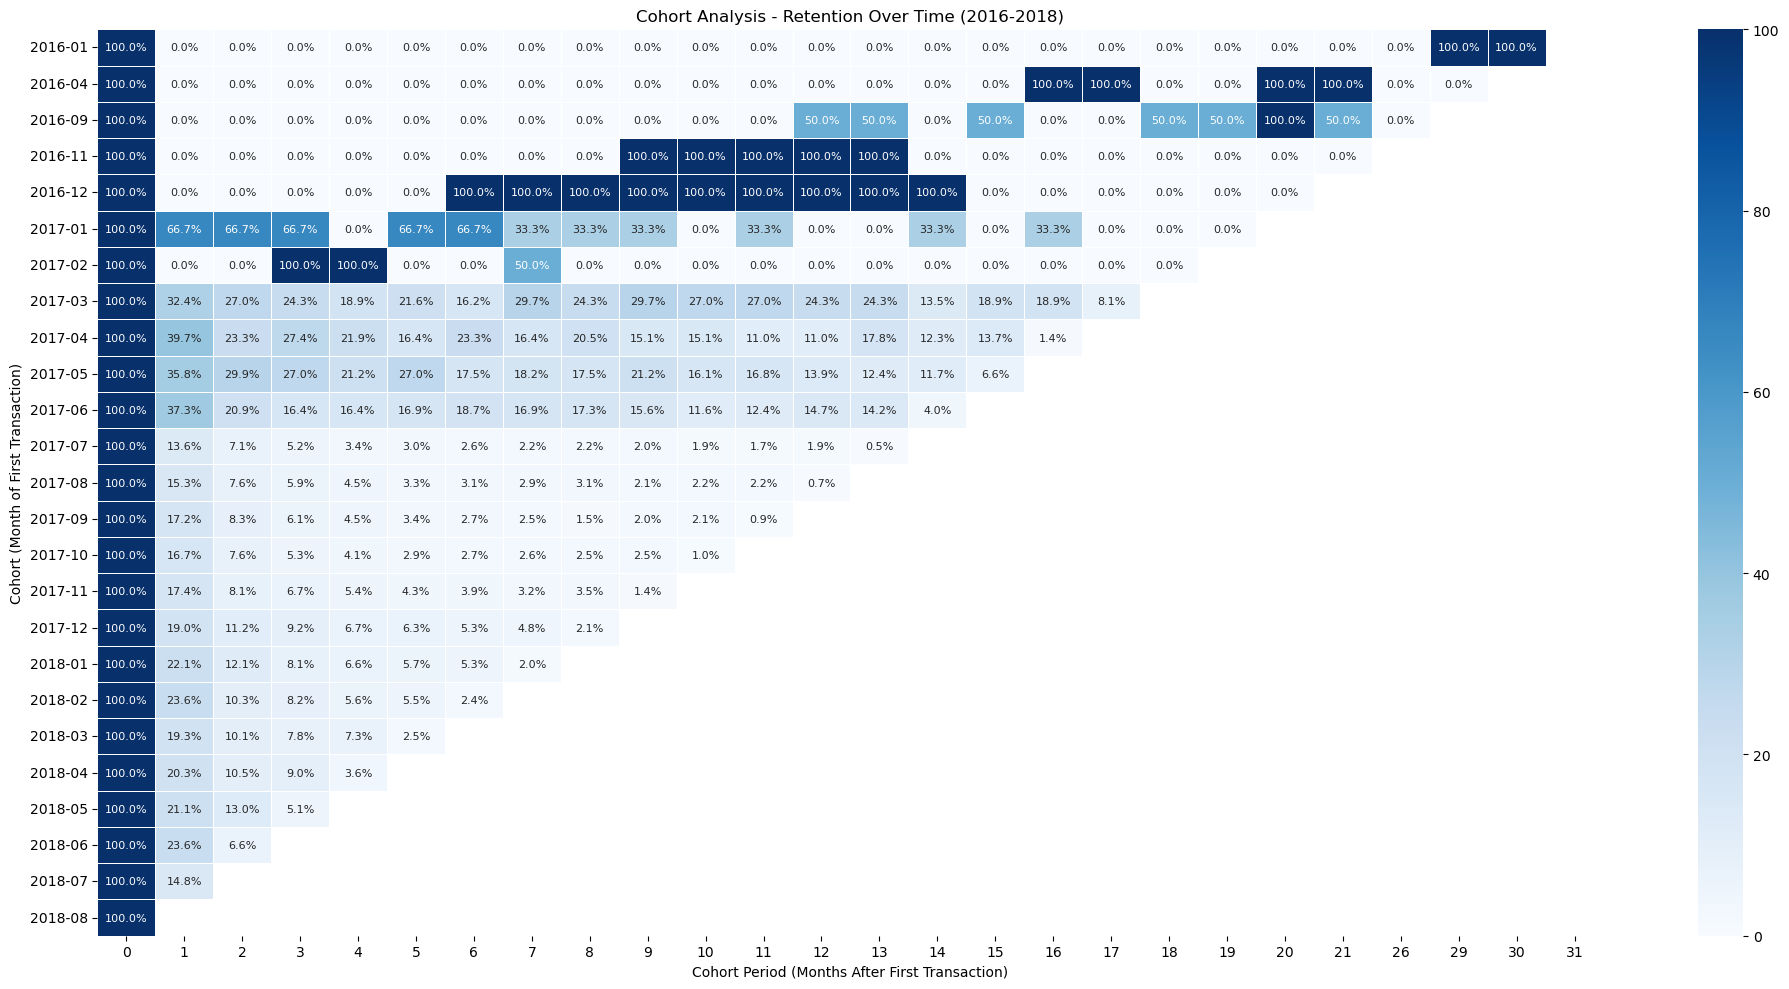

In [28]:
# Mengonversi ke persentase
retention_matrixs = retention_matrix * 100
annotations = retention_matrixs.round(1).astype(str) + '%'
mask = np.zeros_like(retention_matrix, dtype=bool)
cohort_start_row = retention_matrix.index.get_loc('2018-08')

for i in range(0, retention_matrix.shape[0]):
    mask[i, retention_matrix.shape[0]-(i):] = True 

# retention_matrix
# Plot cohort analysis menggunakan heatmap
fig = plt.figure(figsize=(20, 10))
sns.heatmap(retention_matrixs, annot=annotations, fmt='', cmap='Blues',linewidths=.5,annot_kws={"size": 8},mask=mask)
plt.title('Cohort Analysis - Retention Over Time (2016-2018)')
plt.ylabel('Cohort (Month of First Transaction)')
plt.xlabel('Cohort Period (Months After First Transaction)')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
fig.savefig('foo.png', bbox_inches='tight')

In [29]:
jumlah_transaksi = df_1.groupby(['cohort', 'cohort_period','jumlah_total'])['id_user'].nunique().reset_index().copy()
jumlah_transaksi = jumlah_transaksi.groupby(['cohort']).agg({'jumlah_total' : 'sum'}).reset_index(names='cohort')
jumlah_transaksi.sort_values(by='jumlah_total',inplace=True,ignore_index=True,ascending=False)#.reset_index(drop=True)
jumlah_transaksi['jumlah_total'] = jumlah_transaksi['jumlah_total'].apply(lambda x: '{:,.2f}'.format(x))
jumlah_transaksi['cohort'] = jumlah_transaksi['cohort'].dt.strftime("%Y-%m")
jumlah_transaksi

,cohort,jumlah_total
0,2018-03,"50,000,089,665,269,704.00"
1,2018-05,"50,058,205,961,439.67"
2,2018-06,"233,158,507,740.50"
3,2017-11,"70,967,629,239.90"
4,2018-07,"48,372,606,084.00"
5,2018-04,"36,496,857,343.70"
6,2018-02,"30,069,912,342.39"
7,2017-09,"28,251,680,111.30"
8,2017-07,"21,848,176,494.06"
9,2017-08,"20,627,399,720.00"


In [30]:
cohort_dict = {}
lengh_cohort = {}
for i, cohort in enumerate(retention_matrix.index):
    valid_values = retention_matrix.iloc[i, :][~mask[i, :]].dropna()
    if not valid_values.empty:
        lifetime_average = valid_values.mean() * 100
        cohort_dict[cohort] = round(lifetime_average,2)
        lengh_cohort[cohort] = len(valid_values)-1
    else:
        cohort_dict[cohort] = np.nan
        lengh_cohort[cohort] = np.nan
sorted_cohort_dict = dict(sorted(cohort_dict.items(), key=lambda item: item[1], reverse=True))
print('Rata-rata lifetime retensi cohort dan panjangnya periode cohort')
counter = 1
for i in sorted_cohort_dict.keys():
    print(f'{counter} cohort {i} : {sorted_cohort_dict.get(i)}% , panjang periode : {lengh_cohort.get(i)}')
    counter +=1

Rata-rata lifetime retensi cohort dan panjangnya periode cohort
1 cohort 2018-08 : 100.0% , panjang periode : 0
2 cohort 2018-07 : 57.38% , panjang periode : 1
3 cohort 2016-12 : 47.62% , panjang periode : 20
4 cohort 2018-06 : 43.39% , panjang periode : 2
5 cohort 2018-05 : 34.82% , panjang periode : 3
6 cohort 2017-01 : 31.67% , panjang periode : 19
7 cohort 2018-04 : 28.69% , panjang periode : 4
8 cohort 2016-11 : 27.27% , panjang periode : 21
9 cohort 2017-03 : 27.03% , panjang periode : 17
10 cohort 2017-05 : 24.54% , panjang periode : 15
11 cohort 2018-03 : 24.48% , panjang periode : 5
12 cohort 2017-04 : 22.72% , panjang periode : 16
13 cohort 2018-02 : 22.24% , panjang periode : 6
14 cohort 2017-06 : 22.22% , panjang periode : 14
15 cohort 2016-09 : 21.74% , panjang periode : 22
16 cohort 2016-04 : 20.83% , panjang periode : 23
17 cohort 2018-01 : 20.23% , panjang periode : 7
18 cohort 2017-02 : 18.42% , panjang periode : 18
19 cohort 2017-12 : 18.29% , panjang periode : 8
20 c

In [63]:
jumlah_transaksi['retensi'] = jumlah_transaksi['cohort'].apply(lambda x: str(cohort_dict.get(x))+'%')
jumlah_transaksi['total_periode'] = jumlah_transaksi['cohort'].apply(lambda x: lengh_cohort.get(x))
jumlah_transaksi

,cohort,jumlah_total,retensi,total_periode
0,2018-03,"50,000,089,665,269,704.00",24.48%,5
1,2018-05,"50,058,205,961,439.67",34.82%,3
2,2018-06,"233,158,507,740.50",43.39%,2
3,2017-11,"70,967,629,239.90",15.38%,9
4,2018-07,"48,372,606,084.00",57.38%,1
5,2018-04,"36,496,857,343.70",28.69%,4
6,2018-02,"30,069,912,342.39",22.24%,6
7,2017-09,"28,251,680,111.30",12.61%,11
8,2017-07,"21,848,176,494.06",10.52%,13
9,2017-08,"20,627,399,720.00",11.76%,12


In [83]:
jumlah_transaksi.sort_values(by=['jumlah_total','total_periode','retensi'],axis=0,ascending=False)

,cohort,jumlah_total,retensi,total_periode
3,2017-11,"70,967,629,239.90",15.38%,9
13,2017-06,"7,177,027,209.00",22.22%,14
1,2018-05,"50,058,205,961,439.67",34.82%,3
0,2018-03,"50,000,089,665,269,704.00",24.48%,5
4,2018-07,"48,372,606,084.00",57.38%,1
14,2017-05,"4,389,975,344.00",24.54%,15
5,2018-04,"36,496,857,343.70",28.69%,4
17,2018-08,"336,116,868.00",100.0%,0
18,2016-12,"308,901,000.00",47.62%,20
20,2017-02,"30,333,000.00",18.42%,18


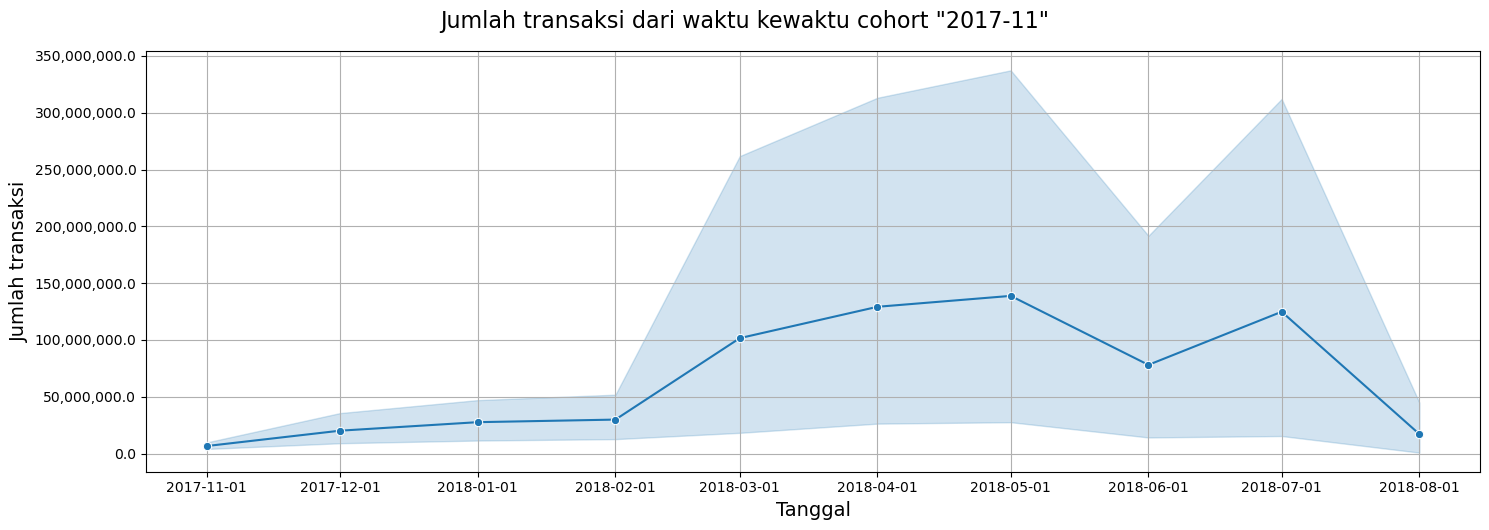

In [105]:
import matplotlib.ticker as ticker
tmp = df_1.loc[df_1['cohort']=='2017-11']
tmp = tmp.sort_values(by='year_month')
# sns.lineplot(data=tmp,x='year_month',y='jumlah_total')

fig, axes = plt.subplots(figsize=(15, 5))
sns.lineplot(data=tmp, x='year_month', y='jumlah_total', ax=axes,marker='o')
axes.set_xlabel('Tanggal',fontsize=14)
axes.set_ylabel('Jumlah transaksi',fontsize=14)
axes.tick_params(axis='x')
axes.ticklabel_format(axis='y',style='plain')
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))
axes.xaxis.set_major_locator(mdates.AutoDateLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes.grid(True)
plt.tight_layout()
plt.suptitle('Jumlah transaksi dari waktu kewaktu cohort "2017-11"',fontsize=16, x=0.5, y=1.05)
plt.show()